In this notebook, you will learn Logistic Regression, and then, you'll create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

Lets first import required libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


### Load Data From CSV File  

In [2]:
churn_df = pd.read_csv("E:\My Documents\Machine Learning\DataSets/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">Data pre-processing and selection</h2>

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [3]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [4]:
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Practice
How many rows and columns are in this dataset in total? What are the name of columns?

In [5]:
# write your code here
churn_df.shape #no. of rows nd no. of cols



(200, 10)

In [6]:
#syntax for getting all the column names is 
#dataframeName.columns
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [8]:
churn_df.info() #how many null/empty values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


Lets define X, and y for our dataset:

In [7]:
#independent variable
#asarray is used to concert columns to same data type to the array 
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]) #independent variable
X[0:1]#0,1,2,3,4

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.]])

In [8]:
#dependent variable
y = np.asarray(churn_df['churn']) #dependent variable
y [0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Also, we normalize the dataset:

In [10]:
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [9]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)


In [11]:
X[0:5] 


array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=200) #trainingsize = 80% test = 20%
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.


In [13]:

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga')
LR.fit(X_train,y_train) #training 
LR


LogisticRegression(solver='saga')

Now we can predict using our test set:

In [14]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]

array([1, 0, 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the 2nd column is the probability of class 1, P(Y=1|X), and first column is probability of class 0, P(Y=0|X):

In [32]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.25588929, 0.74411071],
       [0.79841139, 0.20158861],
       [0.97096173, 0.02903827],
       [0.96107398, 0.03892602],
       [0.78134614, 0.21865386]])

<h2 id="evaluation">Evaluation</h2>

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat) #actualvale,predvalue

0.75

In [16]:
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [15]:
X_test

array([[-1.18150902e+00, -1.00927084e+00, -2.61522001e-01,
        -1.01476095e-03,  9.16299467e-01, -1.03245566e+00,
         1.16316000e+00],
       [-2.08692340e-01,  3.70666503e-01,  1.12010367e+00,
         5.37589130e-01,  9.16299467e-01,  3.10576093e-01,
        -8.59726954e-01],
       [ 9.95747358e-01,  1.44395110e+00,  8.24041023e-01,
        -4.77171824e-01, -6.43359200e-01,  1.87744647e+00,
        -8.59726954e-01],
       [ 1.69061641e+00,  2.59389889e+00,  3.58729236e+00,
        -4.77171824e-01, -6.43359200e-01, -4.72859097e-01,
        -8.59726954e-01],
       [ 1.61904490e-01, -1.31592358e+00, -9.52334835e-01,
        -3.83501582e-01, -6.43359200e-01, -6.96697723e-01,
        -8.59726954e-01],
       [ 9.03098150e-01,  8.30645618e-01,  1.02141612e+00,
         4.04889621e-01, -1.42318853e+00,  1.98936579e+00,
        -8.59726954e-01],
       [ 4.39852113e-01, -1.46924996e+00, -9.52334835e-01,
        -3.05443047e-01,  9.16299467e-01, -1.14437497e+00,
         1.1631600

In [35]:
X_test[:,1] #1 index col values .

array([-1.00927084,  0.3706665 ,  1.4439511 ,  2.59389889, -1.31592358,
        0.83064562, -1.46924996,  2.59389889,  1.59727748,  1.06063518,
        0.3706665 , -0.85594447, -0.7026181 ,  0.52399288,  0.29400332,
       -1.16259721,  0.67731925,  0.83064562, -1.08593403, -1.31592358,
       -0.47262854,  1.06063518, -0.54929173, -0.93260766, -1.46924996,
       -1.2392604 , -0.93260766, -0.85594447, -0.54929173, -0.62595491,
        1.21396155,  0.14067695,  0.06401376,  2.67056208, -0.08931261,
        0.44732969,  1.52061429, -1.08593403, -0.01264943,  0.29400332])

In [36]:
X_test[:,-2] #2nd last colunm values 

array([-1.03245566,  0.31057609,  1.87744647, -0.4728591 , -0.69669772,
        1.98936579, -1.14437497,  3.78007479, -0.69669772,  1.2059306 ,
        0.98209197, -0.80861704, -0.58477841,  0.98209197,  1.2059306 ,
       -1.14437497, -0.24902047,  1.54168853, -0.92053635, -1.14437497,
       -0.13710116,  1.65360785,  0.42249541, -0.58477841, -1.14437497,
       -0.92053635,  0.31057609, -0.36093978, -0.02518185, -0.36093978,
       -0.36093978,  0.87017266, -0.24902047,  0.87017266,  0.19865678,
       -0.02518185, -0.24902047, -1.03245566, -0.80861704,  0.75825334])

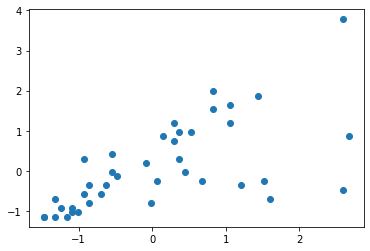

In [17]:
plt.scatter(X_test[:,1],X_test[:,-2])

In [41]:
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [22]:
aaa = list(y_test)

In [24]:
aaa.count(0)

31

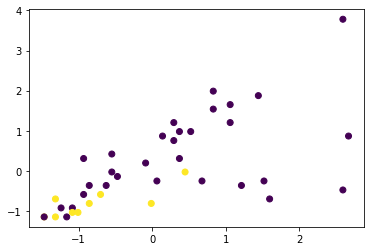

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,1],X_test[:,-2],c = y_test) #coloring based on actual values 

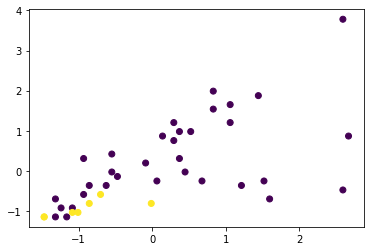

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,1],X_test[:,-2],c = yhat)